# 0 Flux Boundary Condition Explicit Method Diffusion Equation

The Diffusion equation we are trying to solve here is :

> ### $ \frac{\partial c} {\partial t} = D \frac{\partial^2 c}{\partial x^2} $

We are going to assume that all the parameters, namely c, D, t and x are non dimensionalized entities. 

For computation purposes, we need to discretize the above equation to :

> ### $ c ^{t + \Delta t} _{i} = c ^{t} _{i} + D\frac {\Delta t} {\Delta x ^ 2} [c ^{t} _{i-1} - 2c ^{t} _{i} + c ^{t} _{i+1}] $

where we are going to assume as 

>### $ \alpha =  D\frac {\Delta t} {\Delta x ^ 2} $

so the eqaution becomes 

> ### $ c ^{t + \Delta t} _{i} = c ^{t} _{i} ( 1 - 2\alpha ) + \alpha ( c ^{t} _{i-1} + c ^{t} _{i+1} ) $

### Initial Condition 

The inital condition is going to assumed as when i = 1 :

> ### $ c _{i = 1} (t) = 1 $ 

Hence we don't need to solve the diffusion equation at i = 0 as it's always equal to 1 at all time intervals. 

### Boundary Conditions 

The boundary condition is going to be assumed as zero flux at x = L when i = n. We can write it as 

> ### $ (\frac {\partial c}{\partial x} ) _{L} = 0 $

Which when solved and discretized gives us the eqaution for i = n as :

> ### $ c _{i}^{t + \Delta t} = c _{i} ^{t} ( 1 - 2\alpha) + 2c _{i-1}^{t} $

In [0]:
# importing libraries 
import numpy as np
from matplotlib import pyplot as plt

In [0]:
# setting up the non dimentionsalized parameters 

dt = 0.1
dx = 0.5
D = 1.0 # assuming Diffusivity to be unity

alpha = D * dt / dx ** 2 

In [0]:
# defining the composition array
x = np.zeros(101)
for i in range(0,100):
  x[i+1] = x[i] + dx  

In [0]:
# defining the concentration array
c = np.zeros(101)
c[0] = 1.0 # initial condition

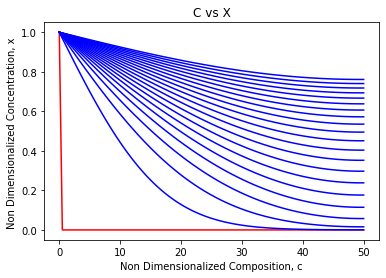

In [5]:
# plotting the initial condition first 
plt.plot(x,c, color = "red")

# for-loops for calculations

for k in range(0,20) : # loop for number of plots to be printed

  for j in range(0, 500) : # loop for no. of timesteps 

    for i in range (1, 100) :

      c[i] = c[i] * (1 - 2 * alpha) + alpha * (c[i-1] + c[i+1])
            
    c[100] = c[i] *  (1 - 2 * alpha) + 2 * alpha * c[i-1]
    
  plt.plot(x,c, color = "blue")
  plt.xlabel("Non Dimensionalized Composition, c")
  plt.ylabel("Non Dimensionalized Concentration, x ")
  plt.title("C vs X")

As we can see in the figure, the initial profile has the red curve which is merging with the x axis. 
These solutions are deviating from the error function as for each curve, the c value at the end is increasing. 

The deviation is because we said that atoms can reach the end point but they are not supposed to escape it. So the atoms come from the initial point, but they get stuck on the end point and as a result the concentration of atoms at the end point keeps increasing. 

Also another thing we can see is that gap between two blue curves is bigger in the lower regions and as we move upwards it becomes smaller and smaller. That is due the concentration gradient (which is driving the diffusion) is decreasing. 